# Setup and Data Loading

In [1]:
#Install Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
#Load the "loan.csv" file into a Pandas DataFrame with low_memory set to False to avoid dtype inference issues, and display the first five rows.
df = pd.read_csv("loan.csv", low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Get the shape of the DataFrame
df.shape

(39717, 111)

# Data Cleaning


## Removing redundant columns

In [4]:
#Drop columns from DataFrame df that have all null values and display the updated shape of df.
for f in df.columns:
    if df[f].isnull().sum() == 39717:
        df.drop(columns=[f], axis=1, inplace=True)
df.shape

(39717, 57)

In [5]:
df.groupby('tax_liens')['tax_liens'].count()

tax_liens
0.0    39678
Name: tax_liens, dtype: int64

In [6]:
df.groupby('delinq_amnt')['delinq_amnt'].count()

delinq_amnt
0    39717
Name: delinq_amnt, dtype: int64

In [7]:
df.groupby('pymnt_plan')['pymnt_plan'].count()

pymnt_plan
n    39717
Name: pymnt_plan, dtype: int64

In [8]:
df.groupby('policy_code')['policy_code'].count()

policy_code
1    39717
Name: policy_code, dtype: int64

In [9]:
df.groupby('chargeoff_within_12_mths')['chargeoff_within_12_mths'].count()

chargeoff_within_12_mths
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [10]:
df.groupby('acc_now_delinq')['acc_now_delinq'].count()

acc_now_delinq
0    39717
Name: acc_now_delinq, dtype: int64

In [11]:
df.groupby('application_type')['application_type'].count()

application_type
INDIVIDUAL    39717
Name: application_type, dtype: int64

In [12]:
df.groupby('collections_12_mths_ex_med')['collections_12_mths_ex_med'].count()

collections_12_mths_ex_med
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [13]:
df.groupby('initial_list_status')['initial_list_status'].count()

initial_list_status
f    39717
Name: initial_list_status, dtype: int64

In [14]:
#Removing the columns with single value
f_list = ['tax_liens','policy_code','chargeoff_within_12_mths','acc_now_delinq','application_type','collections_12_mths_ex_med','delinq_amnt','initial_list_status','pymnt_plan']
for x in f_list:
    print (x)
    df.drop(columns=[x], axis=1, inplace=True)

tax_liens
policy_code
chargeoff_within_12_mths
acc_now_delinq
application_type
collections_12_mths_ex_med
delinq_amnt
initial_list_status
pymnt_plan


In [15]:
df.groupby('emp_title')['emp_title'].count()

emp_title
  old palm inc                       1
 Brocade Communications              1
 CenturyLink                         1
 Department of Homeland Security     1
 Down To Earth Distributors, Inc.    1
                                    ..
zashko inc.                          1
zeno office solutions                1
zion lutheran school                 1
zoll medical corp                    1
zozaya officiating                   1
Name: emp_title, Length: 28820, dtype: int64

In [16]:
df.groupby('title')['title'].count()

title
\tdebt_consolidation         2
   HITEK  EQUIPMENT          1
 APRILIA TUONO 1000R         1
 Auto                        1
 Auto Loan                   1
                            ..
zack                         2
zandercade                   1
zipcar                       1
zxcvb                        1
îîMY FIRST CAR îî    1
Name: title, Length: 19615, dtype: int64

In [17]:
df.groupby('desc')['desc'].count()

desc
\t Member# 809768, loan description. (trying to get more investors, doesn't look like we will make it to fully funded by deadline.) How I plan to use the funds: 16x28 Doughboy Pool with all accessories- $7,200 Pool Installation and bury- $2700 Deck surrounding the pool- $6000 Dirt Haul Away- $400 Credit Card payoff amounts: $1344.72, $838.95, and $521.82 What makes me a good borrower: In life I strive to achieve the best and with that I try my best to keep my credit in the best shape possible. I take pride in paying all my bills on time and even early. I have payed off my truck and will be paying off my other car off in March 2012. I have worked very hard to payoff all my credit cards and i'm down to the last three and with this loan they will be payed off which will save me on the interest rates. ??? My monthly budget: I bring home $2,800/month- (This is minus my car insurance, medical, 401 K, and taxes) Which comes out of my check each week.  Budget List: House with insurance an

In [18]:
df['mths_since_last_delinq'].isnull().sum()

25682

In [19]:
df['mths_since_last_record'].isnull().sum()

36931

In [20]:
df['next_pymnt_d'].isnull().sum()

38577

In [21]:
#Removing columns with text data which is not useful without knowledge of text processing/NLP techniques and columns with more than 50% null values
f_list = ['url','emp_title','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc']
for x in f_list:
    print (x)
    df.drop(columns=[x], axis=1, inplace=True)

url
emp_title
title
mths_since_last_delinq
mths_since_last_record
next_pymnt_d
desc


## Fixing datatype issues

In [22]:
print(df.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp           

In [23]:
df.groupby('term')['term'].count()

term
 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [24]:
#Removing " months" from the end of all entries in term column
df['term'] = df['term'].str.replace(' months', '', regex=False).astype(int)

In [25]:
df.groupby('int_rate')['int_rate'].count()

int_rate
10.00%    251
10.01%      7
10.08%     48
10.14%     10
10.20%     18
         ... 
9.83%       8
9.88%     181
9.91%     377
9.96%      19
9.99%     603
Name: int_rate, Length: 371, dtype: int64

In [26]:
#Converting the percentage string into its correct decimal format
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

In [27]:
df.groupby('grade')['grade'].count()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [28]:
df.groupby('sub_grade')['sub_grade'].count()

sub_grade
A1    1139
A2    1508
A3    1810
A4    2886
A5    2742
B1    1830
B2    2057
B3    2917
B4    2512
B5    2704
C1    2136
C2    2011
C3    1529
C4    1236
C5    1186
D1     931
D2    1348
D3    1173
D4     981
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G3      48
G4      56
G5      30
Name: sub_grade, dtype: int64

In [29]:
df.groupby('emp_length')['emp_length'].count()

emp_length
1 year       3240
10+ years    8879
2 years      4388
3 years      4095
4 years      3436
5 years      3282
6 years      2229
7 years      1773
8 years      1479
9 years      1258
< 1 year     4583
Name: emp_length, dtype: int64

In [30]:
#Function to converting emp_length to the correct integer format
def convert_duration(duration):
    if pd.isna(duration):
        return None
    elif duration == '< 1 year':
        return 0
    elif duration == '10+ years':
        return 10
    else:
        return int(duration.split()[0])  # Extract the number from 'X years'

#Apply the function to the emp_length column
df['emp_length'] = df['emp_length'].apply(convert_duration)

In [31]:
df.groupby('home_ownership')['home_ownership'].count()

home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
Name: home_ownership, dtype: int64

In [32]:
df.groupby('verification_status')['verification_status'].count()

verification_status
Not Verified       16921
Source Verified     9987
Verified           12809
Name: verification_status, dtype: int64

In [33]:
df.groupby('issue_d')['issue_d'].count()

issue_d
Apr-08     155
Apr-09     290
Apr-10     827
Apr-11    1562
Aug-07      33
Aug-08      71
Aug-09     408
Aug-10    1078
Aug-11    1928
Dec-07      85
Dec-08     223
Dec-09     598
Dec-10    1267
Dec-11    2260
Feb-08     174
Feb-09     260
Feb-10     627
Feb-11    1297
Jan-08     171
Jan-09     239
Jan-10     589
Jan-11    1380
Jul-07      30
Jul-08      83
Jul-09     374
Jul-10    1119
Jul-11    1870
Jun-07       1
Jun-08      66
Jun-09     356
Jun-10    1029
Jun-11    1827
Mar-08     236
Mar-09     276
Mar-10     737
Mar-11    1443
May-08      71
May-09     319
May-10     920
May-11    1689
Nov-07      37
Nov-08     184
Nov-09     602
Nov-10    1121
Nov-11    2223
Oct-07      47
Oct-08      96
Oct-09     545
Oct-10    1132
Oct-11    2114
Sep-07      18
Sep-08      32
Sep-09     449
Sep-10    1086
Sep-11    2063
Name: issue_d, dtype: int64

In [34]:
#Converting issue date to proper date time format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [35]:
df.groupby('earliest_cr_line')['earliest_cr_line'].count()

earliest_cr_line
Apr-00    255
Apr-01    176
Apr-02    129
Apr-03    112
Apr-04    137
         ... 
Sep-95    172
Sep-96    176
Sep-97    183
Sep-98    245
Sep-99    258
Name: earliest_cr_line, Length: 526, dtype: int64

In [36]:
#Converting earliest credit line date to proper date time format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
# Update the years greater than 2024
df['earliest_cr_line'] = df['earliest_cr_line'].apply(
    lambda x: x.replace(year=x.year - 100) if x.year > 2024 else x
)

In [37]:
df.groupby('earliest_cr_line')['earliest_cr_line'].count()

earliest_cr_line
1946-01-01    1
1950-12-01    1
1954-10-01    1
1954-11-01    1
1956-09-01    1
             ..
2008-07-01    8
2008-08-01    8
2008-09-01    8
2008-10-01    1
2008-11-01    2
Name: earliest_cr_line, Length: 526, dtype: int64

In [38]:
df.groupby('loan_status')['loan_status'].count()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: loan_status, dtype: int64

In [39]:
df.groupby('purpose')['purpose'].count()

purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: purpose, dtype: int64

In [40]:
df.groupby('zip_code')['zip_code'].count()

zip_code
007xx      1
010xx    100
011xx     14
012xx     14
013xx     14
        ... 
995xx     33
996xx     13
997xx     21
998xx     10
999xx      1
Name: zip_code, Length: 823, dtype: int64

In [41]:
#Extracting the first three digits from the ZIP code
df['zip_code'] = df['zip_code'].str.extract(r'(\d{3})')[0]

In [42]:
df.groupby('addr_state')['addr_state'].count()

addr_state
AK      80
AL     452
AR     245
AZ     879
CA    7099
CO     792
CT     751
DC     214
DE     114
FL    2866
GA    1398
HI     174
IA       5
ID       6
IL    1525
IN       9
KS     271
KY     325
LA     436
MA    1340
MD    1049
ME       3
MI     720
MN     615
MO     686
MS      19
MT      85
NC     788
NE       5
NH     171
NJ    1850
NM     189
NV     497
NY    3812
OH    1223
OK     299
OR     451
PA    1517
RI     198
SC     472
SD      64
TN      17
TX    2727
UT     258
VA    1407
VT      54
WA     840
WI     460
WV     177
WY      83
Name: addr_state, dtype: int64

In [43]:
df.groupby('earliest_cr_line')['earliest_cr_line'].count()

earliest_cr_line
1946-01-01    1
1950-12-01    1
1954-10-01    1
1954-11-01    1
1956-09-01    1
             ..
2008-07-01    8
2008-08-01    8
2008-09-01    8
2008-10-01    1
2008-11-01    2
Name: earliest_cr_line, Length: 526, dtype: int64

In [44]:
#Converting earliest_cr_line to proper date time format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [45]:
df.groupby('revol_util')['revol_util'].count()

revol_util
0%        977
0.01%       1
0.03%       1
0.04%       1
0.05%       1
         ... 
99.50%     24
99.60%     24
99.70%     31
99.80%     23
99.90%     26
Name: revol_util, Length: 1089, dtype: int64

In [46]:
#Converting revol_util % to its correct decimal format
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)

In [47]:
df.groupby('last_pymnt_d')['last_pymnt_d'].count()

last_pymnt_d
Apr-08     12
Apr-09     43
Apr-10    114
Apr-11    420
Apr-12    734
         ... 
Sep-11    450
Sep-12    761
Sep-13    684
Sep-14    693
Sep-15    202
Name: last_pymnt_d, Length: 101, dtype: int64

In [48]:
#Converting last_pymnt_d to proper date time format
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [49]:
df.groupby('last_credit_pull_d')['last_credit_pull_d'].count()

last_credit_pull_d
Apr-09     15
Apr-10     60
Apr-11    135
Apr-12    308
Apr-13    425
         ... 
Sep-11    157
Sep-12    391
Sep-13    390
Sep-14    546
Sep-15    512
Name: last_credit_pull_d, Length: 106, dtype: int64

In [50]:
#Converting last_credit_pull_d to proper date time format
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [51]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

## Null value handling

In [52]:
#Fill emp_length null values with median
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

In [53]:
#Fill revol_util null values with mean
mean_revol_util = df['revol_util'].mean()
rounded_mean = round(mean_revol_util, 4)
df['revol_util'] = df['revol_util'].fillna(rounded_mean)

In [54]:
#Dropping rows which have either last_pymnt_d or last_credit_pull_d null
df = df.dropna(subset=['last_pymnt_d', 'last_credit_pull_d'])

In [55]:
df.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count()

pub_rec_bankruptcies
0.0    37273
1.0     1668
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [56]:
#Fill pub_rec_bankruptcies null values with median
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())

In [57]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

## Outlier handling

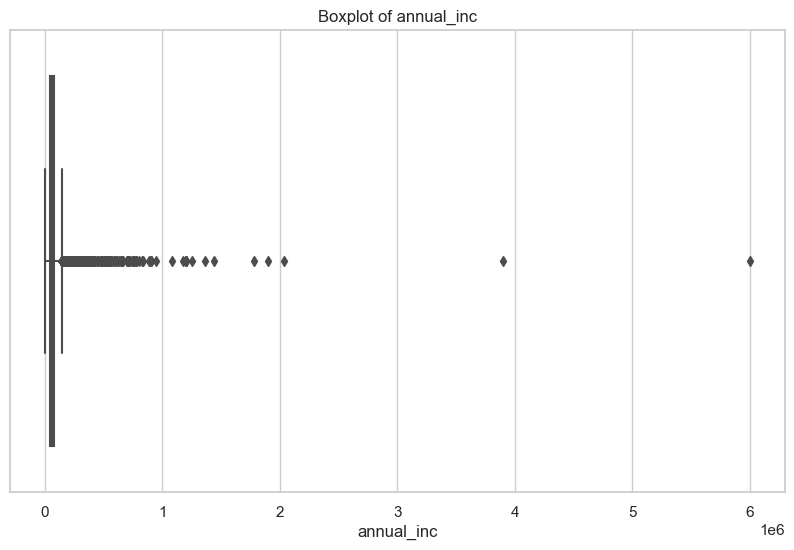

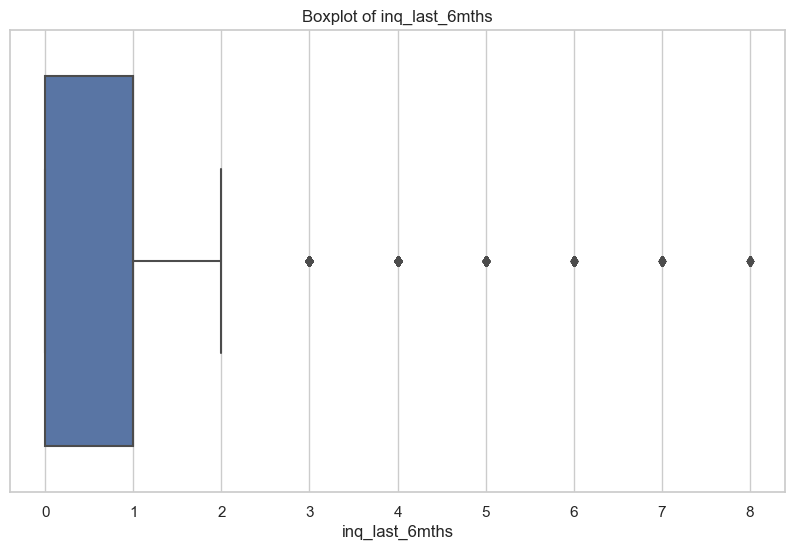

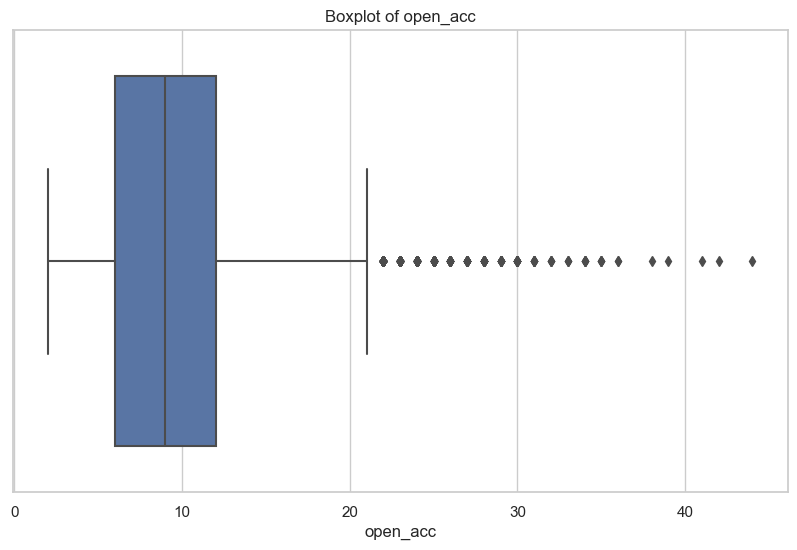

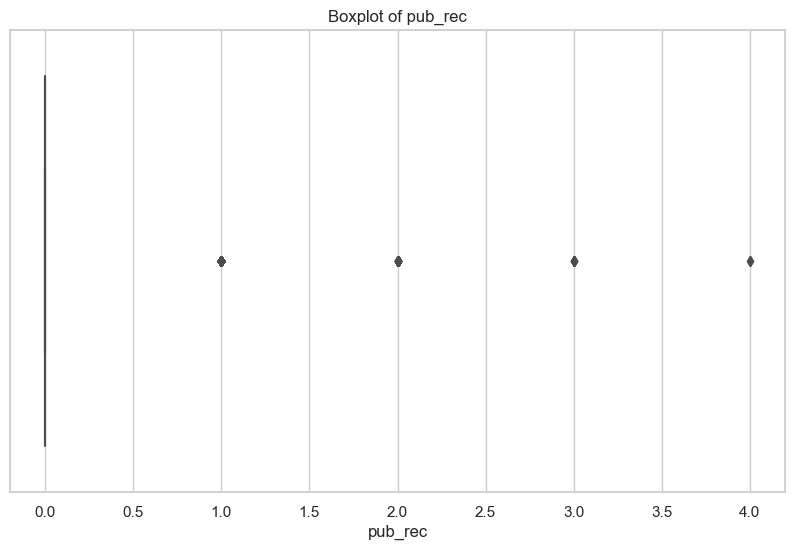

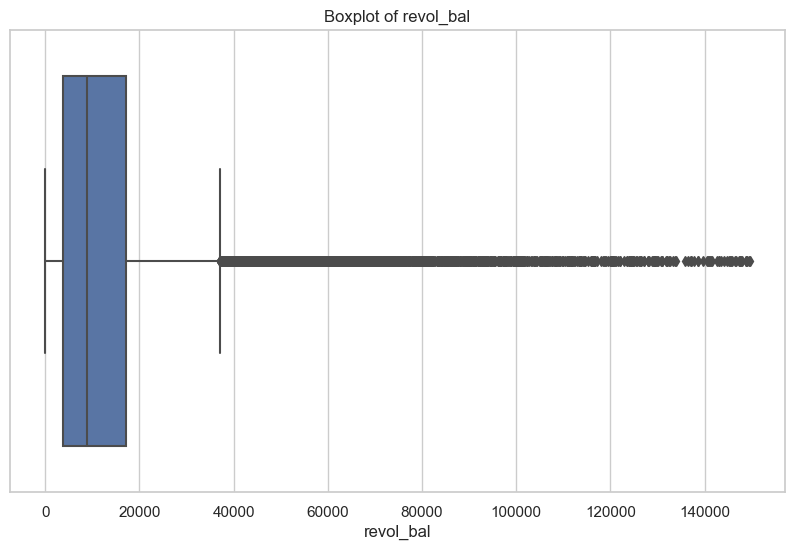

In [58]:
# List of specific numeric columns to plot
specific_columns = [
    'annual_inc',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal'
]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for each specified column
for column in specific_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [59]:
# Calculate the 99th percentile of annual_inc
percentile_99 = df['annual_inc'].quantile(0.99)

# Replace values above the 99th percentile with the 99th percentile value
df['annual_inc'] = df['annual_inc'].where(df['annual_inc'] <= percentile_99, percentile_99)

In [60]:
# Calculate the 99th percentile of revol_bal
percentile_99 = df['revol_bal'].quantile(0.99)

# Replace values above the 99th percentile with the 99th percentile value
df['revol_bal'] = df['revol_bal'].where(df['revol_bal'] <= percentile_99, percentile_99)

# Data Analysis

## Derived Metrics for Further Analysis

In [61]:
# Extract the year from the issue_d
df['issue_year'] = df['issue_d'].dt.year

# Create a binary column for default (1 for Charged Off, 0 for Fully Paid)
df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Extract year from 'earliest_cr_line'
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

# Create a binary column for whether a late fee was paid
df['late_fee_payer'] = df['total_rec_late_fee'].apply(lambda x: 1 if x > 0 else 0)

## Visualisation for Inferences

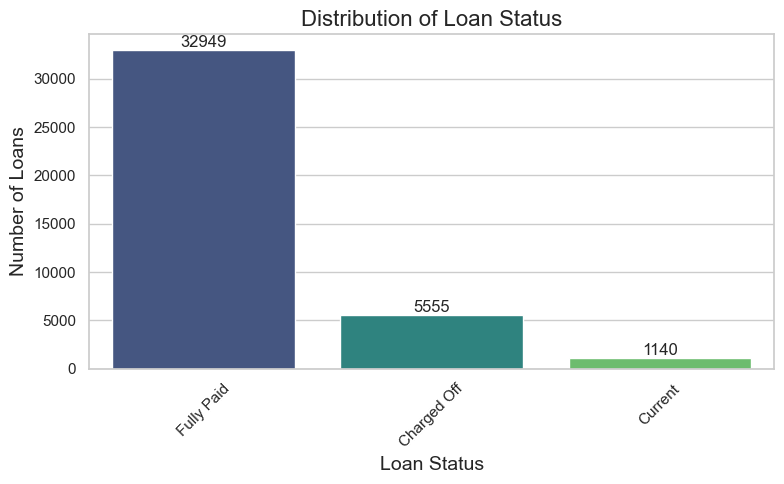

In [62]:
# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')

# Add titles and labels
plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)

# Add value annotations on top of the bars
for index, value in enumerate(loan_status_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("a.png")
plt.show()

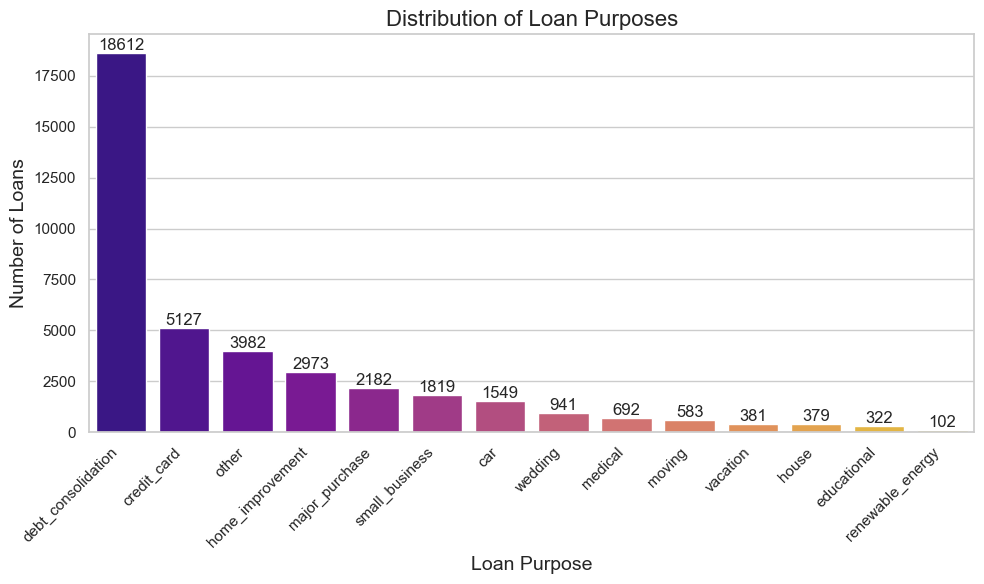

In [63]:
# Count the occurrences of each loan purpose
purpose_counts = df['purpose'].value_counts()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='plasma')

# Add titles and labels
plt.title('Distribution of Loan Purposes', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)

# Add value annotations on top of the bars
for index, value in enumerate(purpose_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("b.png")
plt.show()

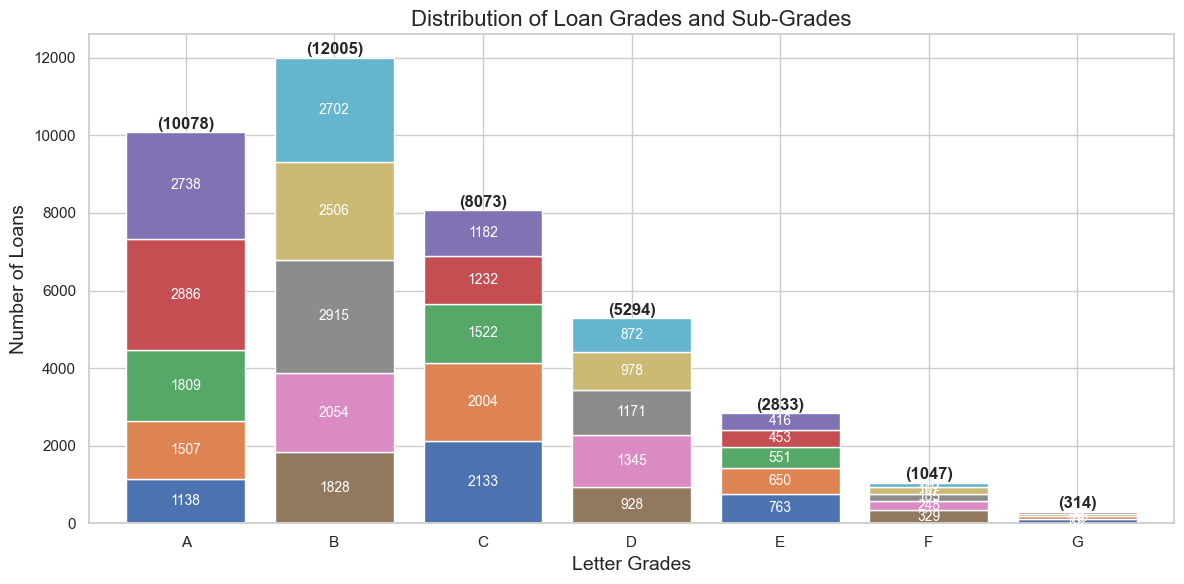

In [64]:
# Count occurrences of each sub_grade
sub_grade_counts = df['sub_grade'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Sub_Grade': sub_grade_counts.index,
    'Count': sub_grade_counts.values,
    'Letter_Grade': sub_grade_counts.index.str[0]  # Get the letter grade (A, B, C, etc.)
})

# Pivot the DataFrame to get counts for each letter grade and sub-grade
pivot_data = plot_data.pivot_table(index='Letter_Grade', columns='Sub_Grade', values='Count', fill_value=0)

# Sort the columns to maintain the order of sub-grades
sub_grade_order = sorted(pivot_data.columns)
pivot_data = pivot_data[sub_grade_order]

# Create a stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)

# Add titles and labels
plt.title('Distribution of Loan Grades and Sub-Grades', fontsize=16)
plt.xlabel('Letter Grades', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)
plt.xticks(rotation=0)

# Add data labels for each sub-grade
for i in range(len(pivot_data)):
    cumulative_height = 0
    for sub_grade in pivot_data.columns:
        count = pivot_data.at[pivot_data.index[i], sub_grade]
        if count > 0:
            ax.text(i, cumulative_height + count / 2, str(count), ha='center', va='center', color='white', fontsize=10)
            cumulative_height += count

    # Add total count for each letter grade in the x-axis label
    total = cumulative_height
    ax.text(i, total + 10, f'({total})', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remove the legend
ax.legend().remove()

# Show the plot
plt.tight_layout()
plt.savefig("c.png")
plt.show()

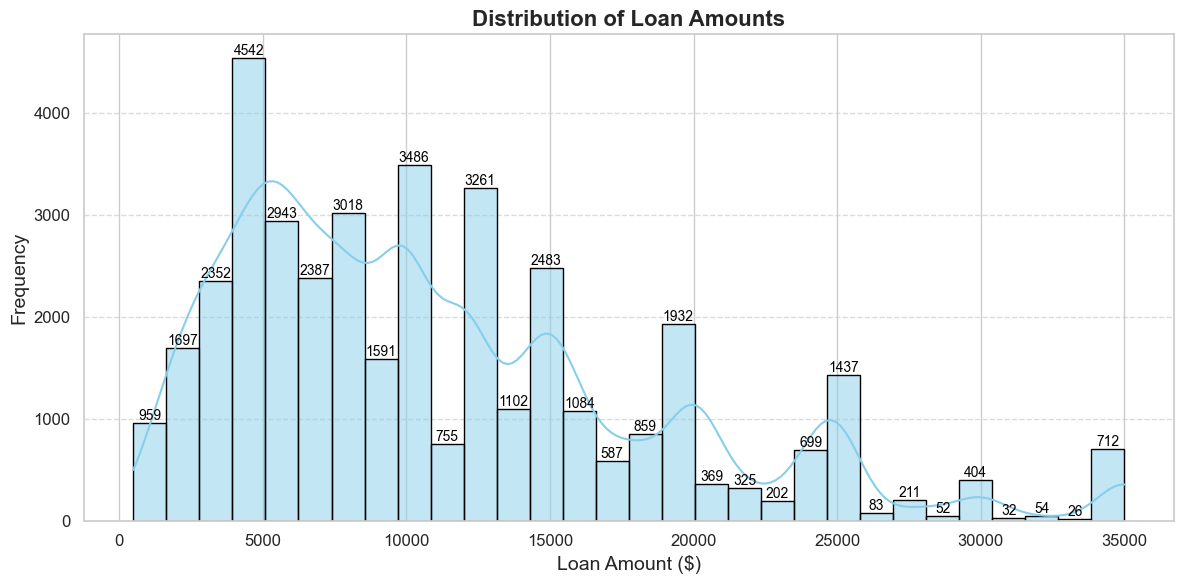

In [65]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['loan_amnt'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Loan Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels for frequency
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label if the height is greater than 0
        ax.annotate(f'{int(height)}', 
                    (patch.get_x() + patch.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.savefig("d.png")
plt.show()

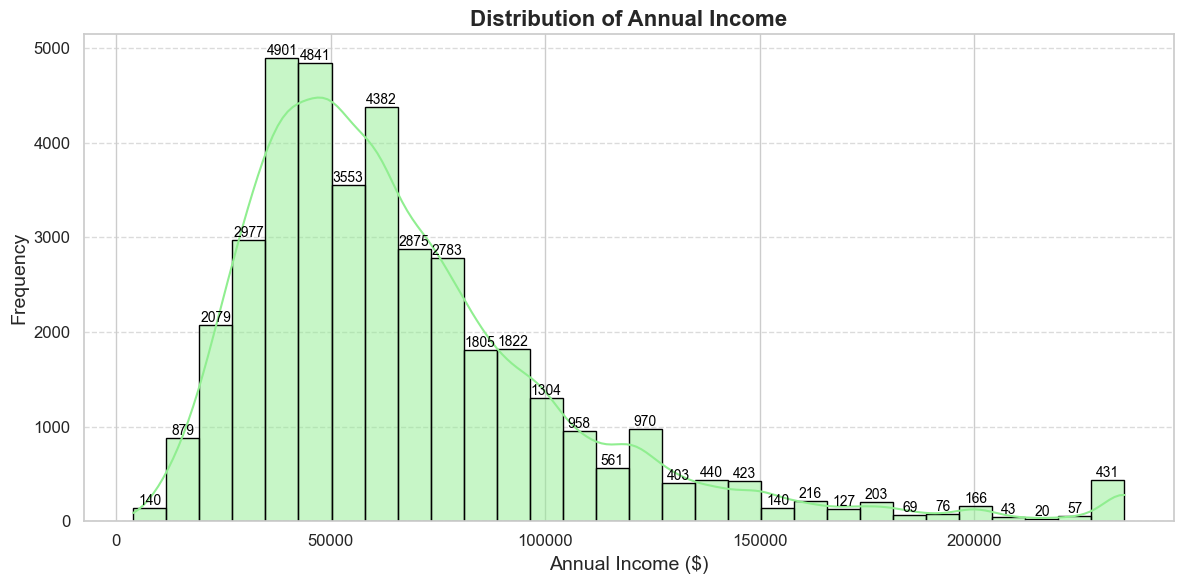

In [66]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['annual_inc'], bins=30, kde=True, color='lightgreen', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Annual Income', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels for frequency
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label if the height is greater than 0
        ax.annotate(f'{int(height)}', 
                    (patch.get_x() + patch.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.savefig("e.png")
plt.show()

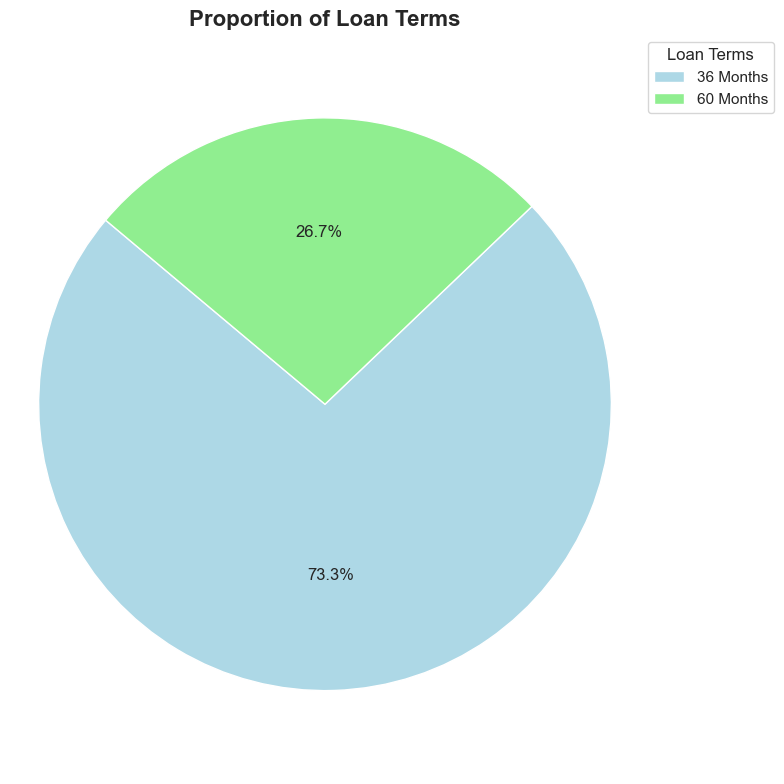

In [67]:
# Count the occurrences of each term
term_counts = df['term'].value_counts()

# Create a pie chart without labels on the border
plt.figure(figsize=(8, 8))
plt.pie(term_counts, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'], labels=None)

# Add title
plt.title('Proportion of Loan Terms', fontsize=16, fontweight='bold')

# Create a legend with custom labels
custom_labels = ['36 Months', '60 Months']
plt.legend(custom_labels, title='Loan Terms', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig("f.png")
plt.show()

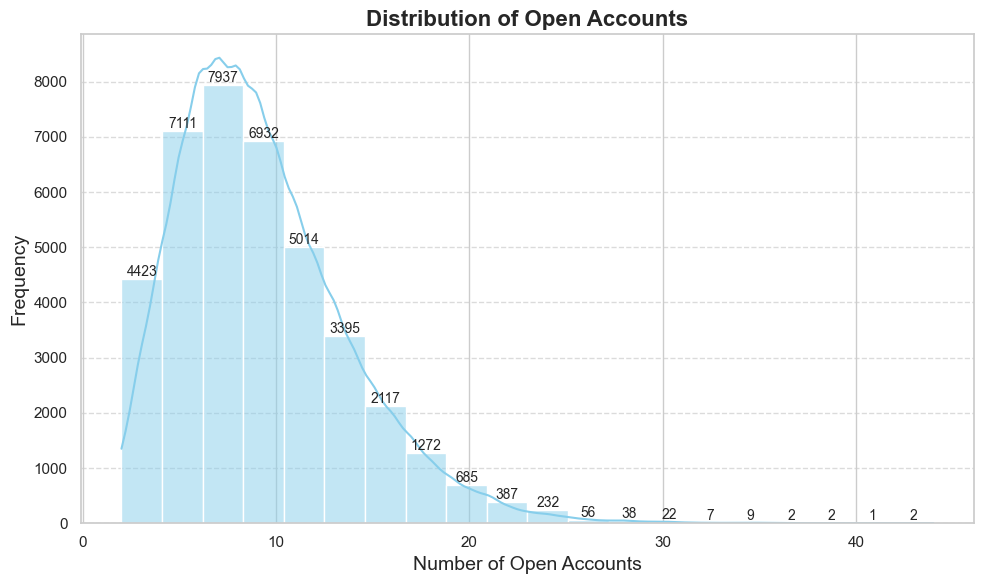

In [68]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of open accounts with 20 bins
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['open_acc'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Open Accounts', fontsize=16, fontweight='bold')
plt.xlabel('Number of Open Accounts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("g.png")
plt.show()

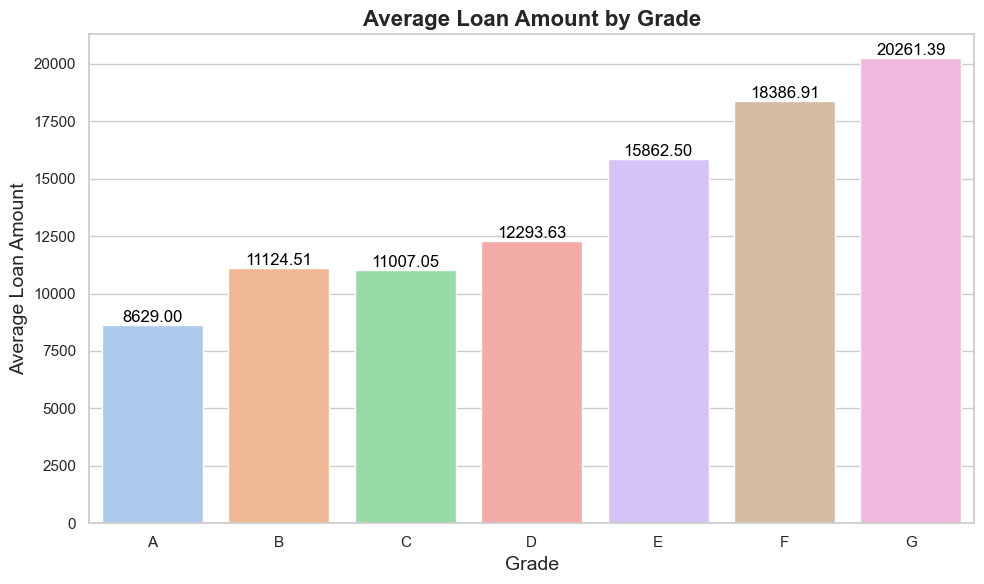

In [69]:
# Calculate the average loan amount by grade
average_loan_by_grade = df.groupby('grade')['loan_amnt'].mean().reset_index()

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_loan_by_grade, x='grade', y='loan_amnt', palette='pastel')

# Add titles and labels
plt.title('Average Loan Amount by Grade', fontsize=16, fontweight='bold')
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)

# Show data labels on top of each bar
for index, row in average_loan_by_grade.iterrows():
    plt.text(row.name, row.loan_amnt, f'{row.loan_amnt:.2f}', color='black', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.savefig("h.png")
plt.show()

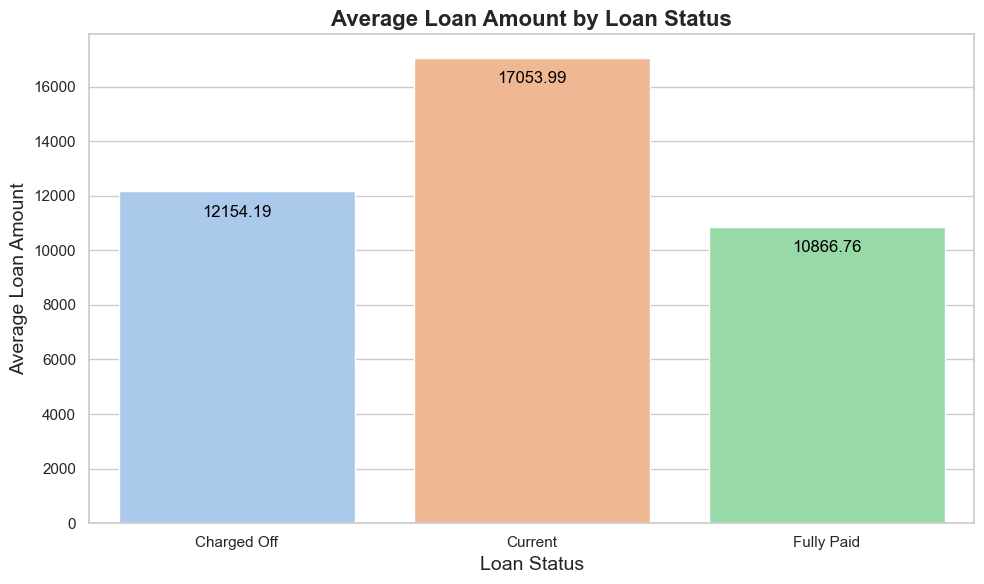

In [70]:
# Calculate the average loan amount by loan status
average_loan_by_status = df.groupby('loan_status')['loan_amnt'].mean().reset_index()

# Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=average_loan_by_status, x='loan_status', y='loan_amnt', palette='pastel')

# Add titles and labels
plt.title('Average Loan Amount by Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)

# Show data labels on top of each bar
for index, row in average_loan_by_status.iterrows():
    # Shift the label down by adjusting the y position
    bar_plot.text(index, row.loan_amnt - 500, f'{row.loan_amnt:.2f}', color='black', ha='center', va='top')

# Display the plot
plt.tight_layout()
plt.savefig("i.png")
plt.show()

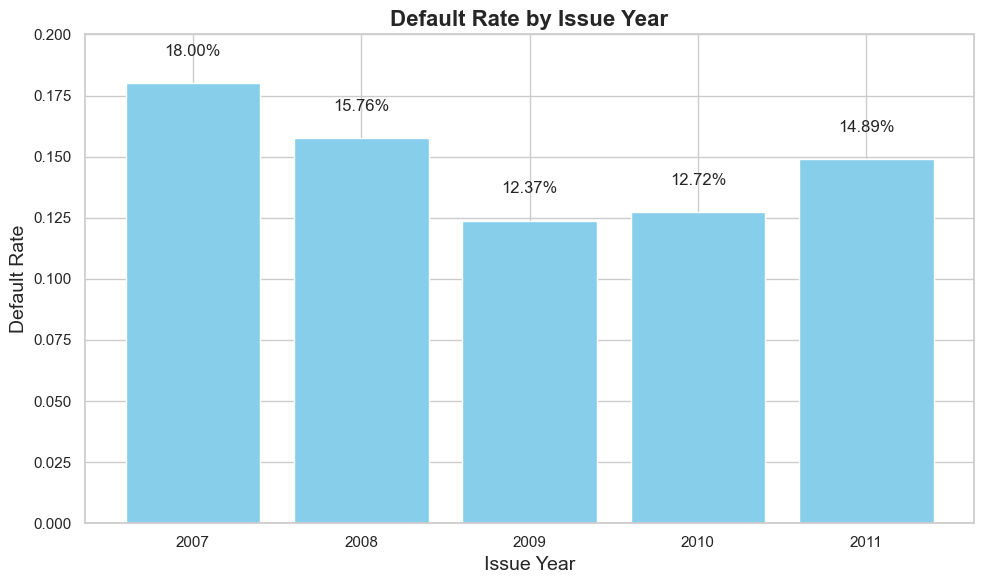

In [71]:
# Group by issue year and calculate total loans and charged off loans
default_analysis = df.groupby('issue_year').agg(
    total_loans=('loan_status', 'count'),
    charged_off_loans=('loan_status', lambda x: (x == 'Charged Off').sum())
).reset_index()

# Calculate the default rate
default_analysis['default_rate'] = default_analysis['charged_off_loans'] / default_analysis['total_loans']

# Visualize the default rate by issue year
plt.figure(figsize=(10, 6))
plt.bar(default_analysis['issue_year'].astype(str), default_analysis['default_rate'], color='skyblue')
plt.title('Default Rate by Issue Year', fontsize=16, fontweight='bold')
plt.xlabel('Issue Year', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.ylim(0, 0.20)  # Set y-axis limits from 0 to 0.20 for better visualization

# Add data labels on top of bars
for index, row in default_analysis.iterrows():
    plt.text(index, row.default_rate + 0.01, f'{row.default_rate:.2%}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.savefig("j.png")
plt.show()

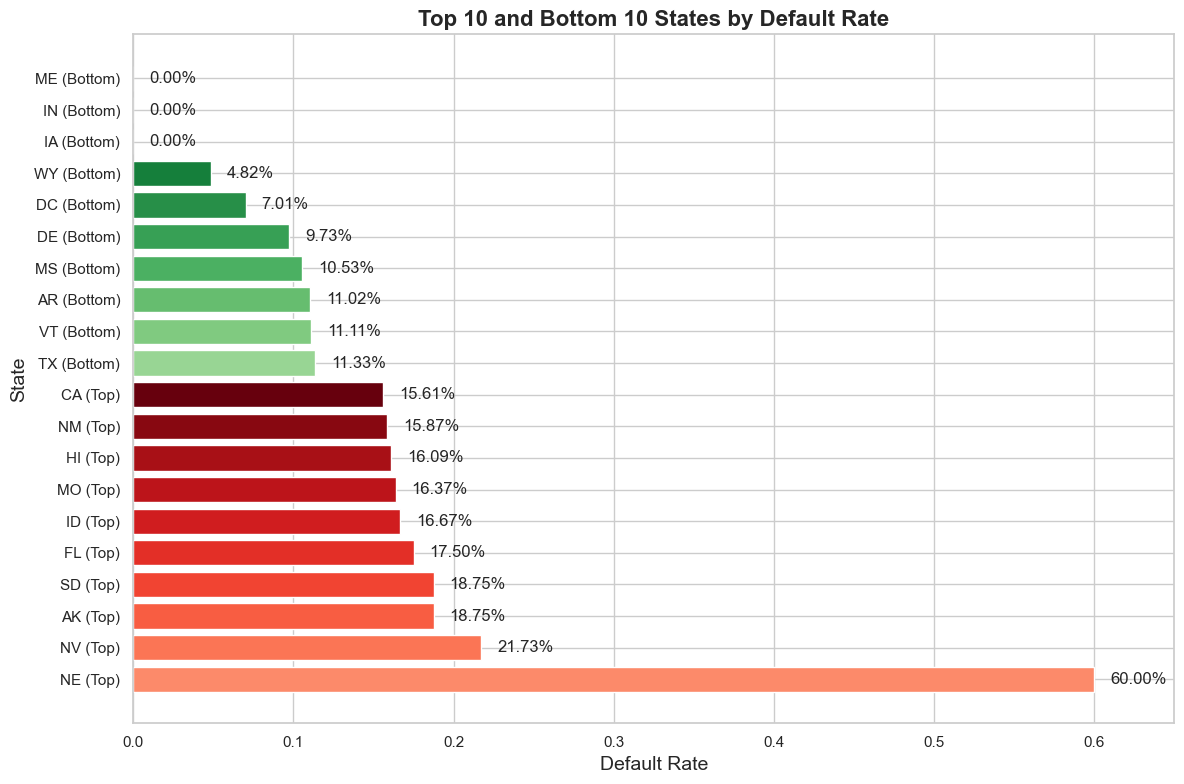

In [72]:
# Group by addr_state and calculate total loans and charged off loans
default_analysis_state = df.groupby('addr_state').agg(
    total_loans=('loan_status', 'count'),
    charged_off_loans=('loan_status', lambda x: (x == 'Charged Off').sum())
).reset_index()

# Step 2: Calculate the default rate
default_analysis_state['default_rate'] = default_analysis_state['charged_off_loans'] / default_analysis_state['total_loans']

# Sort by default rate and select the top 10 and bottom 10 states
top_states = default_analysis_state.sort_values(by='default_rate', ascending=False).head(10)
bottom_states = default_analysis_state.sort_values(by='default_rate', ascending=True).head(10)

# Reverse the order of the bottom states
bottom_states = bottom_states[::-1]

# Combine top and bottom states for visualization
combined_states = pd.concat([top_states, bottom_states])
combined_states['state_label'] = combined_states['addr_state'].apply(lambda x: f"{x} (Top)" if x in top_states['addr_state'].values else f"{x} (Bottom)")

# Visualize the default rate by state name
plt.figure(figsize=(12, 8))

# Create a color gradient for top states (red)
top_colors = plt.cm.Reds(np.linspace(0.4, 1, len(top_states)))
# Create a color gradient for bottom states (green)
bottom_colors = plt.cm.Greens(np.linspace(0.4, 1, len(bottom_states)))

# Combine colors for the bars
colors = np.concatenate([top_colors, bottom_colors])

plt.barh(combined_states['state_label'], combined_states['default_rate'], color=colors)
plt.title('Top 10 and Bottom 10 States by Default Rate', fontsize=16, fontweight='bold')
plt.xlabel('Default Rate', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xlim(0, 0.65)  # Set x-axis limits from 0 to 0.65

# Add data labels on the bars
for index, value in enumerate(combined_states['default_rate']):
    plt.text(value + 0.01, index, f'{value:.2%}', va='center')

# Display the plot
plt.tight_layout()
plt.savefig("k.png")
plt.show()

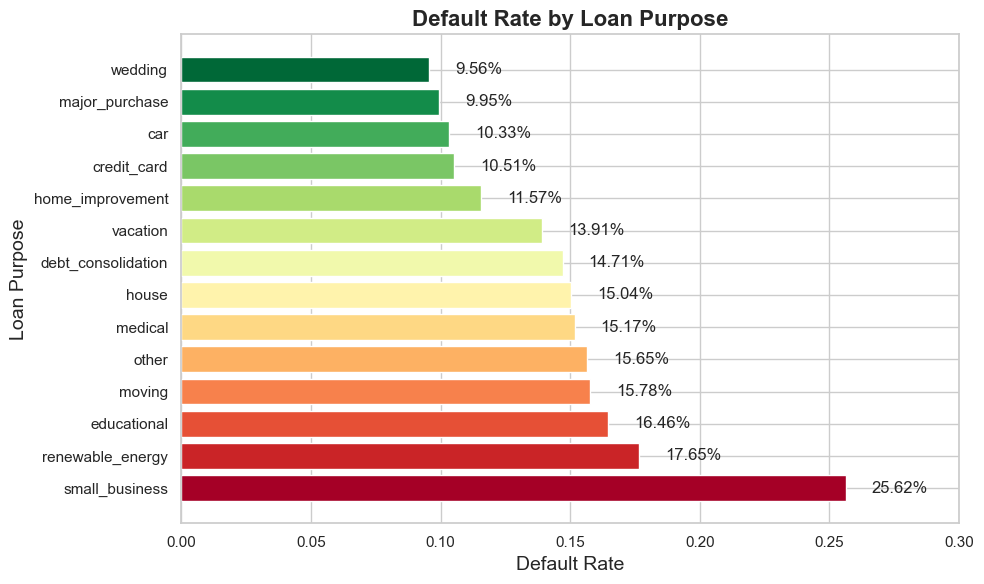

In [73]:
# Group by loan purpose and calculate total loans and charged off loans
default_analysis_purpose = df.groupby('purpose').agg(
    total_loans=('loan_status', 'count'),
    charged_off_loans=('loan_status', lambda x: (x == 'Charged Off').sum())
).reset_index()

# Calculate the default rate
default_analysis_purpose['default_rate'] = default_analysis_purpose['charged_off_loans'] / default_analysis_purpose['total_loans']

# Sort by default rate for better visualization
default_analysis_purpose = default_analysis_purpose.sort_values(by='default_rate', ascending=False)

# Visualize the default rate by loan purpose
plt.figure(figsize=(10, 6))

# Create a color gradient for the bars (red for higher default rates, green for lower)
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(default_analysis_purpose)))

plt.barh(default_analysis_purpose['purpose'], default_analysis_purpose['default_rate'], color=colors)
plt.title('Default Rate by Loan Purpose', fontsize=16, fontweight='bold')
plt.xlabel('Default Rate', fontsize=14)
plt.ylabel('Loan Purpose', fontsize=14)
plt.xlim(0, 0.30)  # Adjust x-axis limits as needed

# Add data labels on the bars
for index, value in enumerate(default_analysis_purpose['default_rate']):
    plt.text(value + 0.01, index, f'{value:.2%}', va='center')

# Display the plot
plt.tight_layout()
plt.savefig("l.png")
plt.show()

Unique loan statuses: ['Charged Off' 'Current' 'Fully Paid']


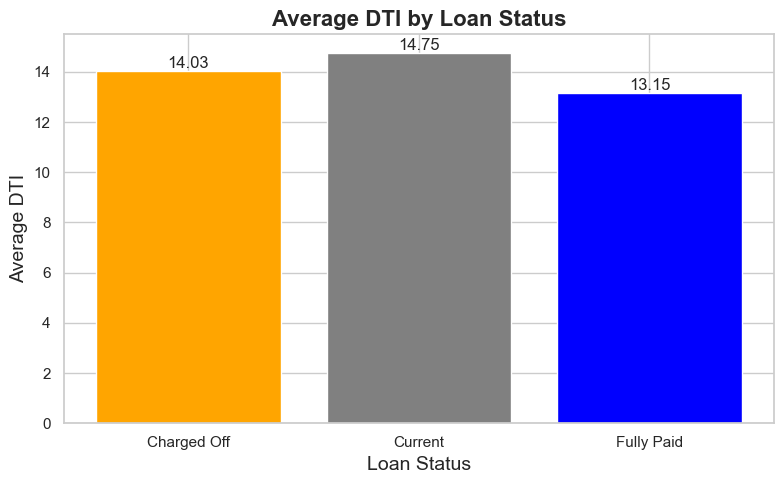

In [74]:
# Group by loan status and calculate the average DTI
average_dti_by_status = df.groupby('loan_status')['dti'].mean().reset_index()

# Drop rows with NaN values
average_dti_by_status = average_dti_by_status.dropna()

# Print unique loan statuses to debug
print("Unique loan statuses:", average_dti_by_status['loan_status'].unique())

# Define a color scheme with distinct colors for each loan status
color_map = {
    'Charged Off': 'orange',
    'Fully Paid': 'blue',
    # Add more statuses and colors as needed
}

# Assign colors based on the loan status, using a default color for unmapped values
average_dti_by_status['color'] = average_dti_by_status['loan_status'].map(color_map).fillna('grey')

# Visualize the average DTI by loan status
plt.figure(figsize=(8, 5))

plt.bar(average_dti_by_status['loan_status'], average_dti_by_status['dti'], color=average_dti_by_status['color'])
plt.title('Average DTI by Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average DTI', fontsize=14)

# Add data labels on the bars
for index, value in enumerate(average_dti_by_status['dti']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.savefig("m.png")
plt.show()

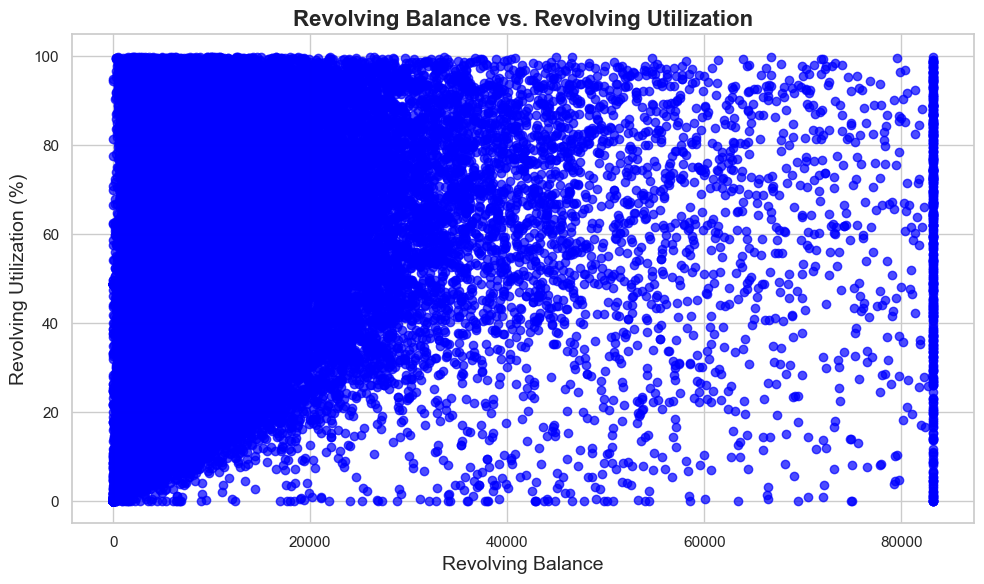

In [75]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['revol_bal'], df['revol_util'], alpha=0.7, color='blue')
plt.title('Revolving Balance vs. Revolving Utilization', fontsize=16, fontweight='bold')
plt.xlabel('Revolving Balance', fontsize=14)
plt.ylabel('Revolving Utilization (%)', fontsize=14)

# Display the plot
plt.tight_layout()
plt.savefig("n.png")
plt.show()

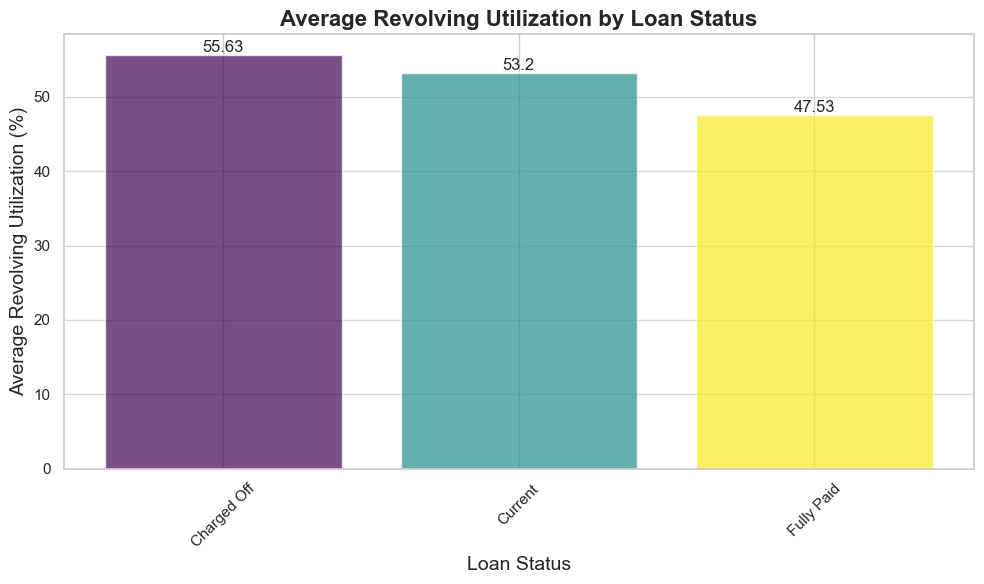

In [76]:
# Calculate the average revol_util by loan_status
average_revol_util = df.groupby('loan_status')['revol_util'].mean().reset_index()

# Create a bar plot with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(average_revol_util)))  # Use a colormap for different colors

plt.figure(figsize=(10, 6))
bars = plt.bar(average_revol_util['loan_status'], average_revol_util['revol_util'], color=colors, alpha=0.7)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.title('Average Revolving Utilization by Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Revolving Utilization (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig("o.png")
plt.show()

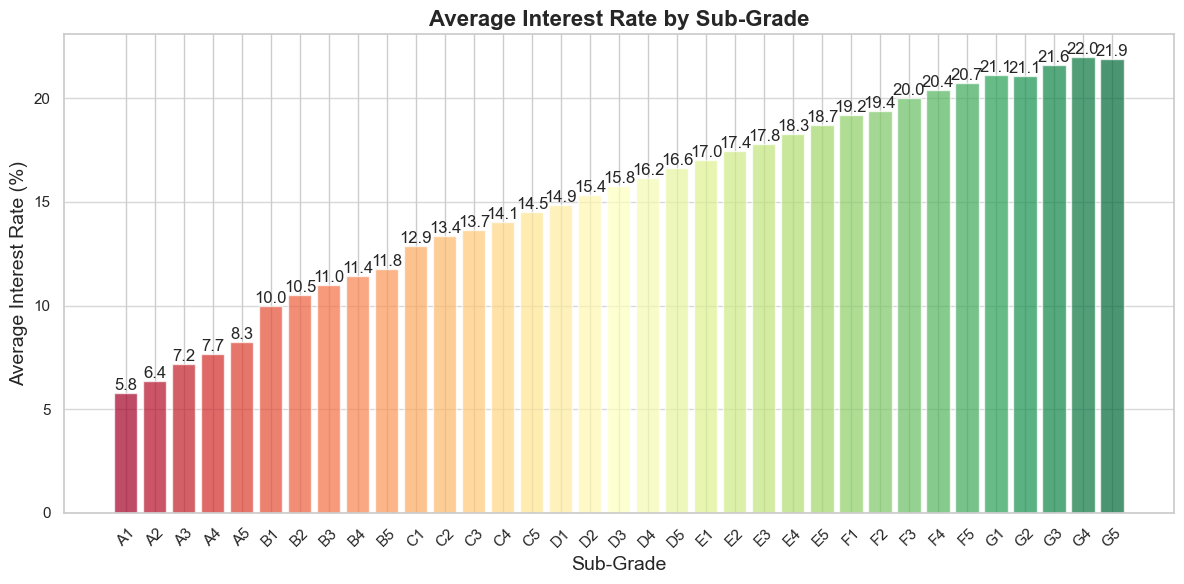

In [77]:
# Calculate the average interest rate by sub_grade
average_int_rate = df.groupby('sub_grade')['int_rate'].mean().reset_index()

# Create a gradient color map from green to red
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(average_int_rate)))

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(average_int_rate['sub_grade'], average_int_rate['int_rate'], color=colors, alpha=0.7)

# Add data labels on top of each bar with one decimal place
for index, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

plt.title('Average Interest Rate by Sub-Grade', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Grade', fontsize=14)
plt.ylabel('Average Interest Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig("p.png")
plt.show()

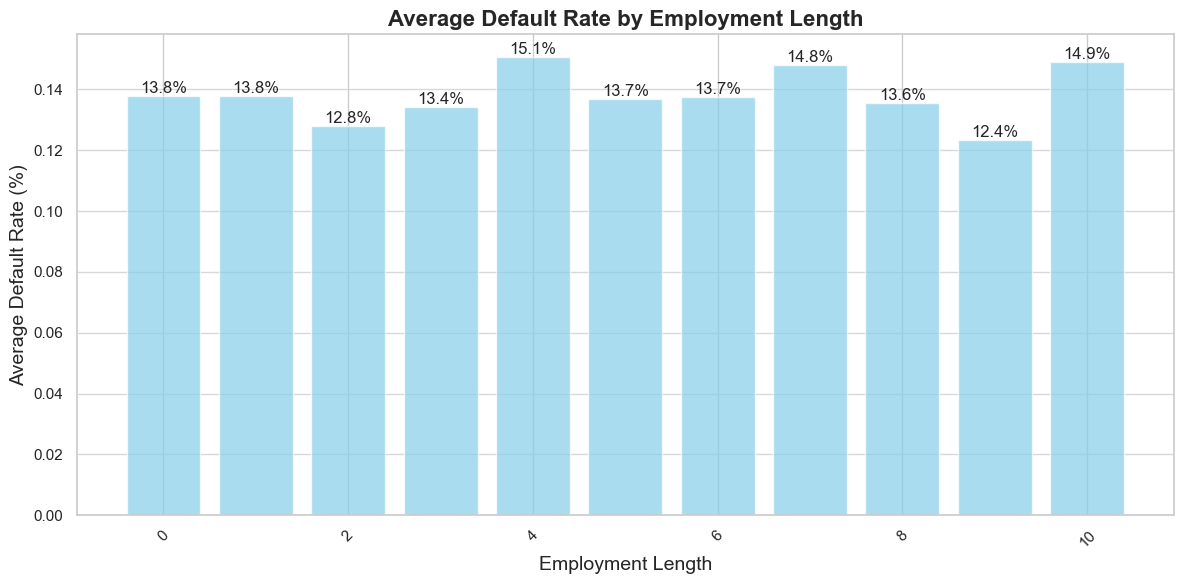

In [78]:
# Calculate the average default rate by emp_length
average_default_rate = df.groupby('emp_length')['default'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(average_default_rate['emp_length'], average_default_rate['default'], color='skyblue', alpha=0.7)

# Add data labels on top of each bar with one decimal place
for index, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1%}", ha='center', va='bottom', fontsize=12)

plt.title('Average Default Rate by Employment Length', fontsize=16, fontweight='bold')
plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Average Default Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig("q.png")
plt.show()

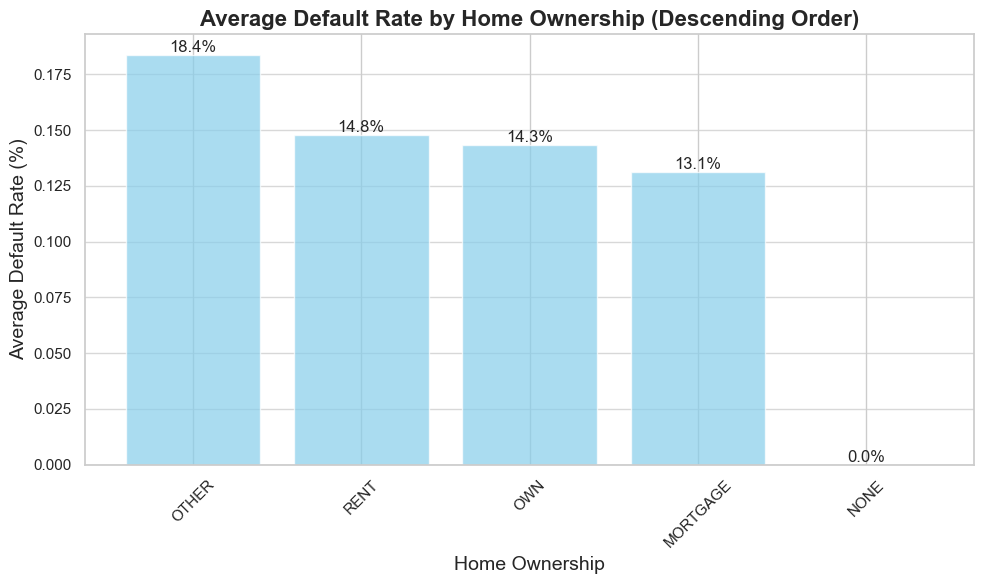

In [79]:
# Calculate the average default rate by home_ownership
average_default_rate_home_ownership = df.groupby('home_ownership')['default'].mean().reset_index()

# Sort by default rate in descending order
average_default_rate_home_ownership = average_default_rate_home_ownership.sort_values(by='default', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(average_default_rate_home_ownership['home_ownership'], average_default_rate_home_ownership['default'], color='skyblue', alpha=0.7)

# Add data labels on top of each bar with one decimal place
for index, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1%}", ha='center', va='bottom', fontsize=12)

plt.title('Average Default Rate by Home Ownership (Descending Order)', fontsize=16, fontweight='bold')
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Average Default Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig("r.png")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_20584\2799396615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  default_rate = df.groupby(df['issue_d'].dt.to_period('M')).mean()['default'].reset_index()


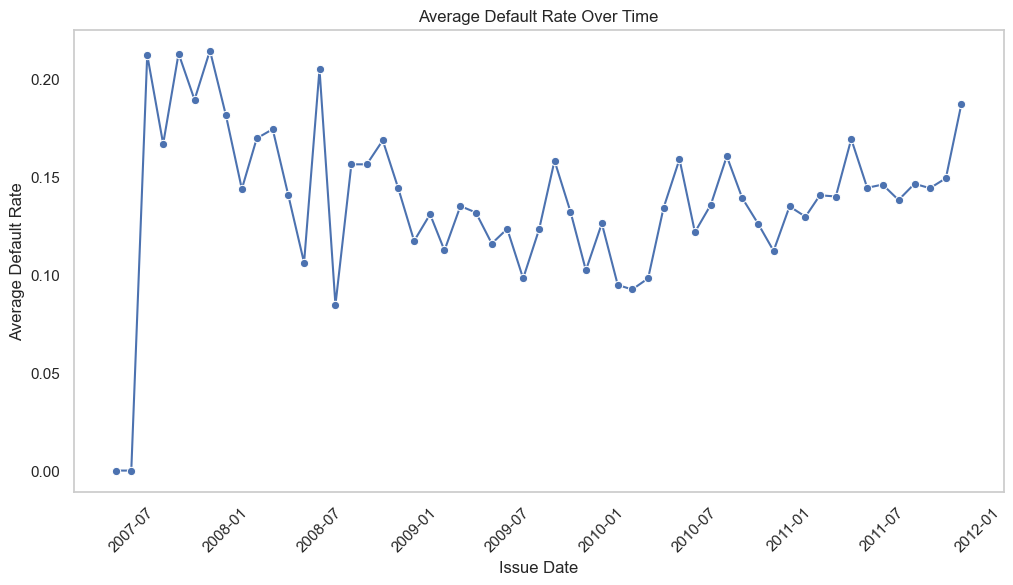

In [80]:
# Group by 'issue_d' and calculate average default rate
default_rate = df.groupby(df['issue_d'].dt.to_period('M')).mean()['default'].reset_index()

# Convert period back to datetime for plotting
default_rate['issue_d'] = default_rate['issue_d'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=default_rate, x='issue_d', y='default', marker='o')
plt.title('Average Default Rate Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=45)
plt.grid()
plt.savefig("s.png")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_20584\2207283995.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  default_rate_by_year = df.groupby('earliest_cr_year').mean()['default'].reset_index()


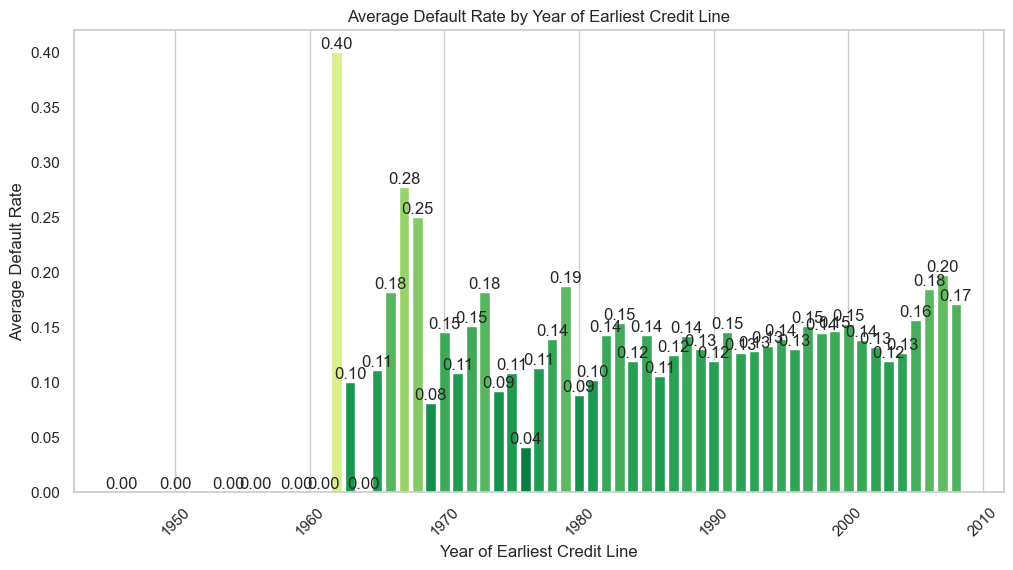

In [81]:
# Group by 'earliest_cr_year' and calculate average default rate
default_rate_by_year = df.groupby('earliest_cr_year').mean()['default'].reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a color gradient
cmap = plt.cm.get_cmap('RdYlGn')
colors = [cmap(1-val) for val in default_rate_by_year['default']]

# Create the bar plot
bars = plt.bar(default_rate_by_year['earliest_cr_year'], default_rate_by_year['default'], color=colors)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title('Average Default Rate by Year of Earliest Credit Line')
plt.xlabel('Year of Earliest Credit Line')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig("t.png")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_20584\1231256824.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


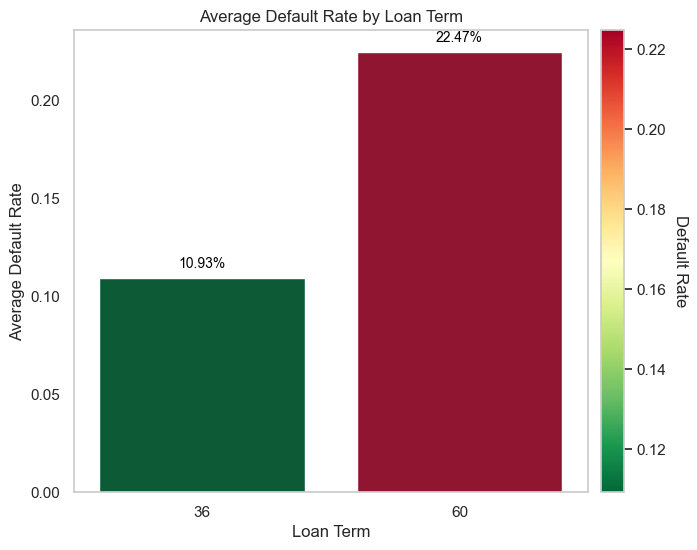

In [82]:
# Group by 'term' and calculate the average default rate
default_rate_by_term = df.groupby('term')['default'].mean().reset_index()

# Normalize the default rates for color mapping
norm = Normalize(vmin=default_rate_by_term['default'].min(), vmax=default_rate_by_term['default'].max())
sm = ScalarMappable(cmap='RdYlGn_r', norm=norm)  # RdYlGn reversed to make lower values green

# Visualize with gradient colors
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    data=default_rate_by_term,
    x='term',
    y='default',
    palette=[sm.to_rgba(value) for value in default_rate_by_term['default']]
)

# Add labels and title
plt.title('Average Default Rate by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Average Default Rate')
plt.grid(axis='y')

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2%}',  # Format as percentage
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Add a color bar for reference
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Default Rate', rotation=270, labelpad=15)

plt.savefig("u.png")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_20584\3724469670.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


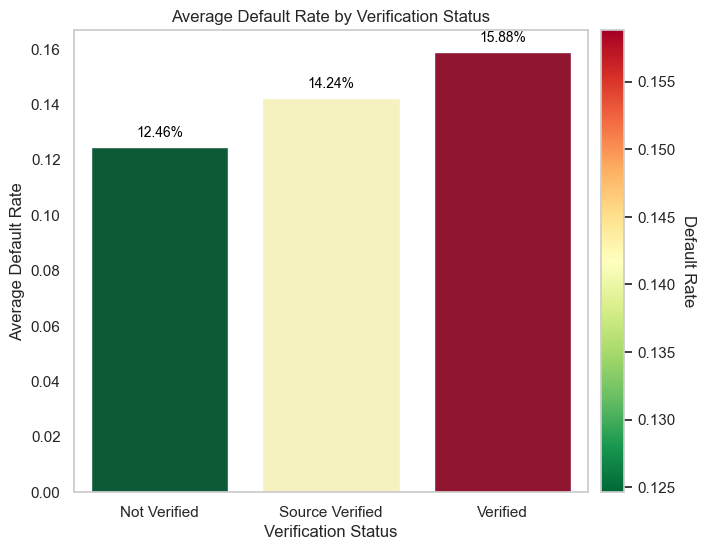

In [83]:
# Group by 'verification_status' and calculate the average default rate
default_rate_by_verification = df.groupby('verification_status')['default'].mean().reset_index()

# Normalize the default rates for color mapping
norm = Normalize(vmin=default_rate_by_verification['default'].min(), vmax=default_rate_by_verification['default'].max())
sm = ScalarMappable(cmap='RdYlGn_r', norm=norm)  # Reversed for green (low) to red (high)

# Visualize with normalized colors
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    data=default_rate_by_verification,
    x='verification_status',
    y='default',
    palette=[sm.to_rgba(value) for value in default_rate_by_verification['default']]
)

# Add labels and title
plt.title('Average Default Rate by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Average Default Rate')
plt.grid(axis='y')

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2%}',  # Format as percentage
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Add a color bar for reference
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Default Rate', rotation=270, labelpad=15)

plt.savefig("v.png")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_20584\1883136736.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


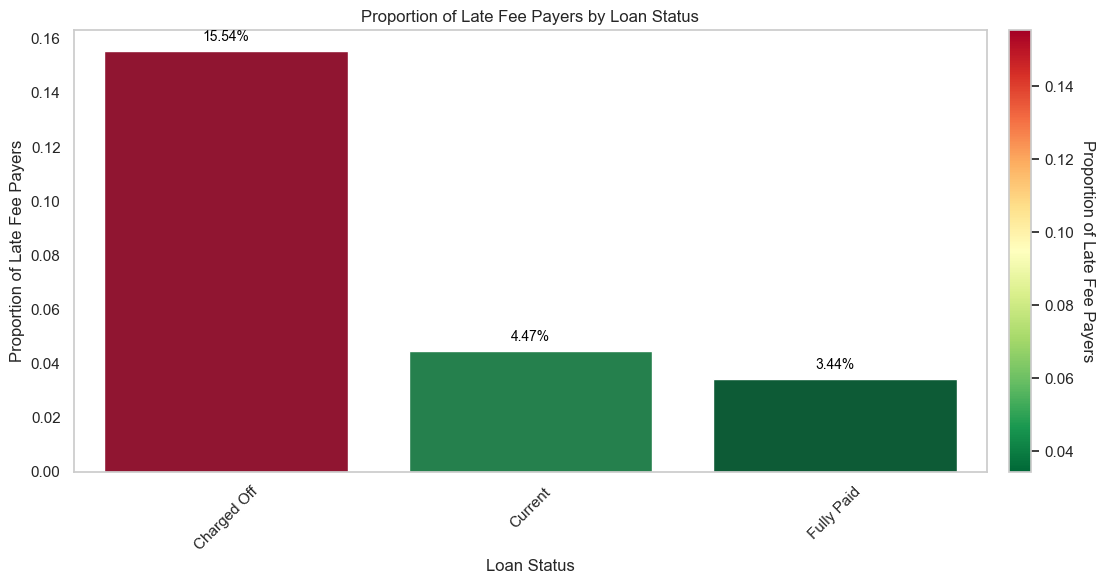

In [84]:
# Group by 'loan_status' and calculate the proportion of late fee payers
late_fee_proportion = df.groupby('loan_status')['late_fee_payer'].mean().reset_index()

# Normalize the proportion values for gradient colors
norm = Normalize(vmin=late_fee_proportion['late_fee_payer'].min(), vmax=late_fee_proportion['late_fee_payer'].max())
sm = ScalarMappable(cmap='RdYlGn_r', norm=norm)  # Reversed to map low values to green and high values to red
colors = [sm.to_rgba(value) for value in late_fee_proportion['late_fee_payer']]

# Visualize the proportions with gradient colors
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=late_fee_proportion,
    x='loan_status',
    y='late_fee_payer',
    palette=colors
)

# Add labels and title
plt.title('Proportion of Late Fee Payers by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion of Late Fee Payers')
plt.grid(axis='y')

# Adding data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2%}',  # Format as percentage
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Add a color bar for reference
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Proportion of Late Fee Payers', rotation=270, labelpad=15)

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.savefig("w.png")
plt.show()

C:\Users\rajee\AppData\Local\Temp\ipykernel_20584\2369061718.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)


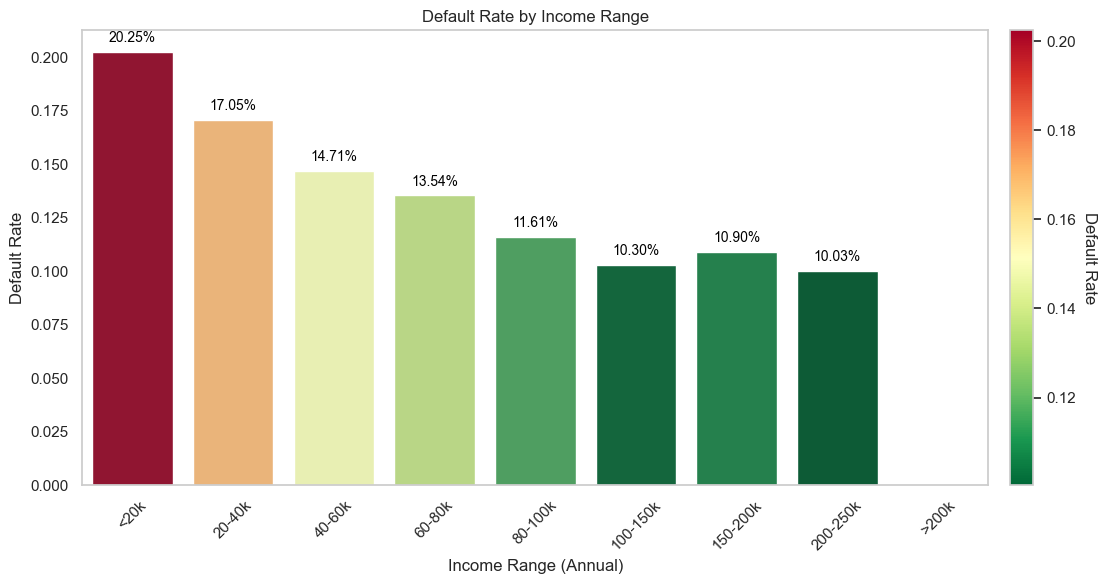

In [85]:
# Bin the income data into ranges
bin_edges = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 250000, float('inf')]
bin_labels = ['<20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-150k', '150-200k', '200-250k', '>200k']
df['income_bin'] = pd.cut(df['annual_inc'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the default rate for each income bin
default_rate_by_income = df.groupby('income_bin')['default'].mean().reset_index()

# Normalize the default rates for gradient colors
norm = Normalize(vmin=default_rate_by_income['default'].min(), vmax=default_rate_by_income['default'].max())
sm = ScalarMappable(cmap='RdYlGn_r', norm=norm)  # Reversed colormap for gradient (green to red)
colors = [sm.to_rgba(value) for value in default_rate_by_income['default']]

# Visualize with gradient colors
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=default_rate_by_income,
    x='income_bin',
    y='default',
    palette=colors
)

# Add labels and title
plt.title('Default Rate by Income Range')
plt.xlabel('Income Range (Annual)')
plt.ylabel('Default Rate')
plt.grid(axis='y')

# Adding data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2%}',  # Format as percentage
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Add a color bar for reference
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
cbar.set_label('Default Rate', rotation=270, labelpad=15)

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.savefig("x.png")
plt.show()